# Predicting Price Of A Banglore Apartment

In [1]:
# Importing few libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize']=(10,6)

In [2]:
# Reading data

df = pd.read_csv("D:/Softwares/DS/Project/RealEstate/bengaluru_house_prices.csv")
df.head(8)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00


In [3]:
# No. of rows and cols

df.shape

(13320, 9)

In [4]:
# Getting area type col info by grouping it 

df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
# Removing few cols

df1 = df.drop(['area_type', 'availability', 'society', 'balcony'], axis = 'columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df1.shape

(13320, 5)

#### Data Cleaning -



In [8]:
# Checking for null values

df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
# Since it can be seen that their are few missing values so dropping it because these na values are very small and the
# dataset has 13k rows so can safely drop the rows

# Dropping the rows

df2 = df1.dropna()
print(df2.isnull().sum())
print('\n Shape of data(df2):', df2.shape)

# (If not dropping then these na values could also be replaced by median)

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

 Shape of data(df2): (13246, 5)


In [10]:
# Exploring size column

print(df2['size'].value_counts())
print('-------------------------------------')
print('\n Unique values:', df2['size'].unique())

2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
13 BHK           1
16 BHK           1
27 BHK           1
19 BHK           1
14 BHK           1
18 Bedroom       1
12 Bedroom       1
43 Bedroom       1
Name: size, dtype: int64
-------------------------------------

 Unique values: ['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' '9 Bedroom' '27 BHK' '10 Bedroom'
 '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom' '14 BHK' '8 BHK'
 '12 Bedroom' '13 BHK' '18 Bedroom']


In [11]:
# Now creating a new col out of size col which will only have no. of bhk's and not term 'bhk/bedroom' in it

df2['BHK'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head(3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3


In [12]:
df2['BHK'].unique()

# It shows a home with 27,43 bedrooms. Lets check those particular homes  

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
# Checking homes above 20 bedrooms

df2[df2['BHK']>20]

# (Not possible to have a home with 43 bedrooms within 2400 total sqft. This seems like a error.)


,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [14]:
# Exploring total_sqft column

df2['total_sqft'].unique()

# Here it can be seen some values with range(1133-1384), and also the dtype is object so will convert it into float

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
# Creating a function and passing only 1 value to convert it into float. Like these range value(1133-1384) won't  get 
# converted into float. Range value will go into except block and return false otherwise true(in case of single value)

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
# df2[df2['total_sqft'].apply(is_float)] # so when I run, it will surely return true but I want to see those value where its not a
                                        # valid float number. Hence running below loc with negate operation(~)
    
df2[~df2['total_sqft'].apply(is_float)].head(10) #this will return a df where numbers other than single value will be shown.
                                        # Like range values and the values with some units

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [17]:
# Creating a function for range values which will return average of those 2 (Not working on values having unit)

def convert_range_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
# Checking function on random values

print('Single value which got converted to float:', convert_range_sqft_to_num('2323'))
print('Range value which got converted to average:',convert_range_sqft_to_num('2000-3000'))
print('Checking for values having unit:', convert_range_sqft_to_num('4125Perch'))

Single value which got converted to float: 2323.0
Range value which got converted to average: 2500.0
Checking for values having unit: None


In [19]:
# Now adding this function(convert_range_sqft_to_num) to total_sqft column

df3 = df2.copy() #creating a deep copy of df2
df3['total_sqft'] = df3['total_sqft'].apply(convert_range_sqft_to_num)
df3.head(3)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [20]:
# Checking if the values got reflected in our dataset (checking with help of index 30)

print(df3.loc[30])

# (Earlier it had range of 2100-2850 which now got converted into average)
print('\n Average:',(2100+2850)/2)

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

 Average: 2475.0


#### Feature Engineering

In [21]:
df4 = df3.copy() 

In [22]:
# Creating a new column (out of total_sqft and price) named price_per_sqft which can be helpful in removing outlier ahead

df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft'] #as our price col is in lacs so multiplied it by 1lac
df4.head(3)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556


In [23]:
# Exploring location col

print(df4['location'].unique())
print('\nLength of location:', len(df4['location'].unique())) #which is quite huge
                                                              

['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']

Length of location: 1304


In [24]:
# Working on location (Checking deeply like their mightbe some locations which has so many flats while
#                      their might be few location which only has 1 flat )

df4['location'] = df4['location'].apply(lambda x: x.strip()) #this will remove all the unwanted spaces(leading space or end space)

location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False) #grouping by count in desc order
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [25]:
# Setting a threshold value as 10 for location

print(location_stats[location_stats<=10])
print('\n Location stats <= to 10 :', len(location_stats[location_stats<=10])) #we have 1052 location which have less than 
                                                                                # 10 flats out of 1293 

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

 Location stats <= to 10 : 1052


In [26]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [27]:
# Appyling a function which will convert those location having <=10 value as 'Other' category

df4['location'] = df4['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x) 
len(df4['location'].unique())

# Now out of 1293 unique location we have got 242 unique locations
# (this will be good when we do one hot encoding further because having 242 extra columns to existing df4 columns is ok than 
#  having 1293 extra cols to existing ones)

242

In [28]:
df4.head(10)

# 'other' location successfully added

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


#### Outlier Removal

In [29]:
# Outlier can be anything like data error, or anamoly

# One of the way to remove outliers is by having domain knowledge.
# In this case since we have the Banglore real estate data so its unlikely that bedroom has less than 300sqft size.
# Typical sqft per bedroom can be considered as 300sqft.
# Using this criteria trying to find out the outliers

df4[df4['total_sqft']/df4['BHK']<300].head()

# (Here are some of the outliers, (like 6 bedroom in just 1020 sqft which is unusual)). So we can consider safely removing this.

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [30]:
df4.shape

(13246, 7)

In [31]:
df5 = df4[~(df4['total_sqft']/df4['BHK']<300)]
df5.shape

# Safely removed 744 outliers considering the criteria that a bedroom should atleast have 300sqft size 

#(This was one of the way to remove outliers, We can have more outliers in the data)

(12502, 7)

In [32]:
# Also using other way to remove outliers. Using price_per_sqft col, here I want to check all the values where either the 
# price_per_sqft is very very low or very high.

df5['price_per_sqft'].describe()

# Although its very unlikey to get a property in Banglore at Rs 267.82/sqft.
# Also their can be properties at 176470rs/sqft but they might be somewhere in prime location 
# (As we are building a generic model so it makes sense to remove this kind of extreme cases)

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [33]:
# Creating a function(on price_per_sqft col) which can remove above extreme cases value based on Standard Deviation

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-std)) & (subdf.price_per_sqft<=(m+std))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df6 = remove_pps_outliers(df5)
df6.shape

# (Removed some more outliers which were present in the data by using price_per_sqft column)
# (In total we have removed (13246-10241)=3005 outliers by using (total_sqft/BHK) and price_per_sqft column)

(10241, 7)

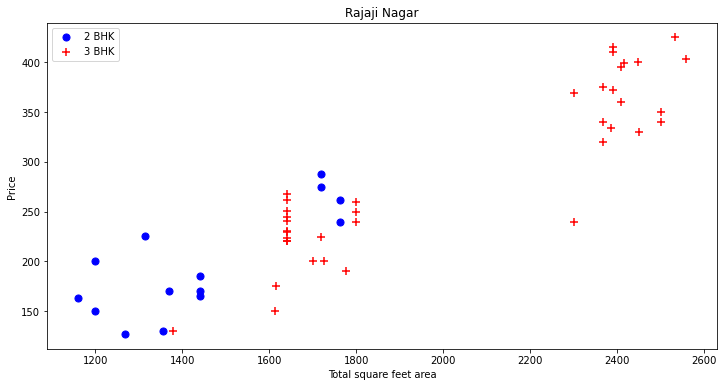

In [34]:
# Now checking whether the property price of 2BHK is greater than 3BHK for the same or nearabout sqft area
# Like in some of the cases we can have the price of 2BHK higher than that of 3BHK and this could be because of many reasons
# like due to the location a property could have certain aminities or something like that

# For this lets create a function to draw a scatter plot so that we may get to see this behaviour of data

def plot_scatter_chart(df, location):
    BHK2 = df[(df['location']==location) & (df['BHK']==2)]
    BHK3 = df[(df['location']==location) & (df['BHK']==3)]
    matplotlib.rcParams['figure.figsize'] = (12,6)
    plt.scatter(BHK2.total_sqft, BHK2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(BHK3.total_sqft, BHK3.price, marker='+', color='red', label='3 BHK', s=50)
    plt.xlabel('Total square feet area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6, 'Rajaji Nagar') 

# (Here we can see that in Rajaji Nagar their are two 2BHK apartments whose price is higher than 3BHK apartments for 
#  the same total sqft area(at 1750 on x-axis)). Their are again two 2BHK apartments at 1790 on x-axis.

In [35]:
# Removing those properties where for same location the price of 2BHK is higher than 3BHK apartments (with same square ft. area)

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        BHK_stats = {}
        for BHK, BHK_df in location_df.groupby('BHK'):
            BHK_stats[BHK] = {
                'mean':np.mean(BHK_df.price_per_sqft),
                'std':np.std(BHK_df.price_per_sqft),
                'count':BHK_df.shape[0]
                              }
        for BHK, BHK_df in location_df.groupby('BHK'):
            stats = BHK_stats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, BHK_df[BHK_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df7 = remove_bhk_outliers(df6)
df7.shape

# Removed some more outliers which were present in the data. 
# (Here we have specifically removed apartment entries(like those where 2BHK apartment price was higher than 3BHK for same location))

(7329, 7)

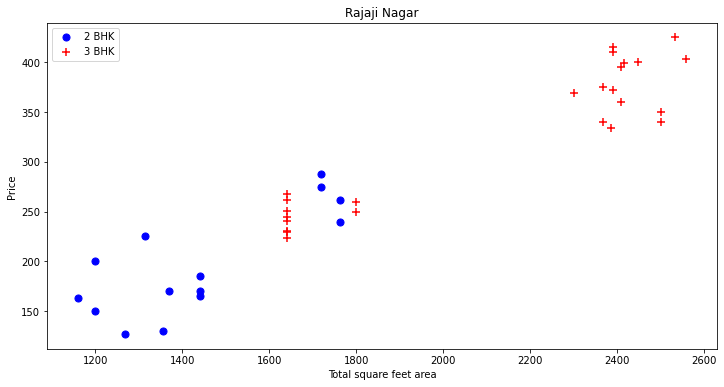

In [36]:
# Again plotting scatter plot to see the improvement above function(remove_bhk_outliers) has done

plot_scatter_chart(df7, 'Rajaji Nagar') 

# (Here we can see that those 2BHK's which were earlier showing higher price than 3BHK's in our scatter plot have disappeared)

Text(0, 0.5, 'Count')

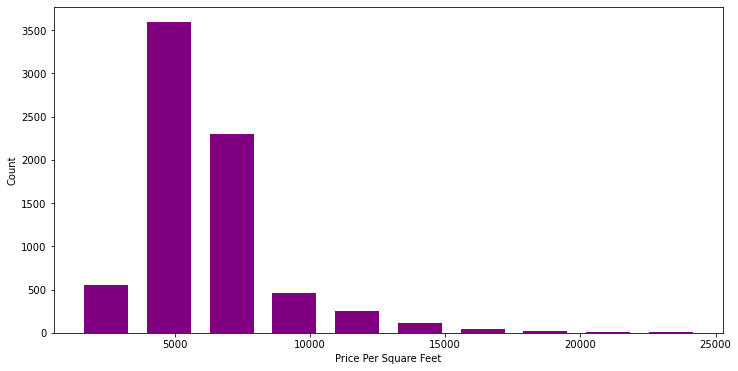

In [69]:
# Plotting histogram to check the count of price per sqft

plt.hist(df7['price_per_sqft'], rwidth=0.7, color='purple')
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

# from 0-10000 I have majority of my data points that means most of the apartments are in range from 2500 to 10000.

Text(0, 0.5, 'Count')

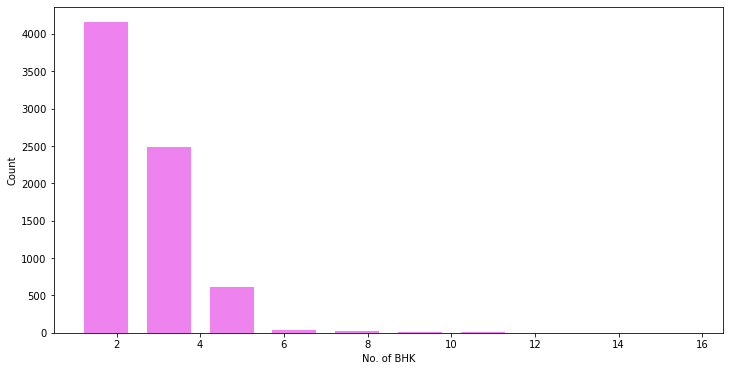

In [70]:
# Plotting histogram to check the count of BHK apartment

plt.hist(df7['BHK'], rwidth=0.7,color='violet')
plt.xlabel('No. of BHK')
plt.ylabel('Count')

# Most of the properties are of 2BHK apartments

In [39]:
# Exploring Bath column

df7['bath'].unique()

# Here it can be seen that their are 12, 16 bahtrooms which is very very unlikely

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [40]:
# Looking for apartments having more than 10 bath

df7[df7['bath']>10]

# (For 10BHK apartment its possible to have 10 Bath and same goes for 11, 13 )

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

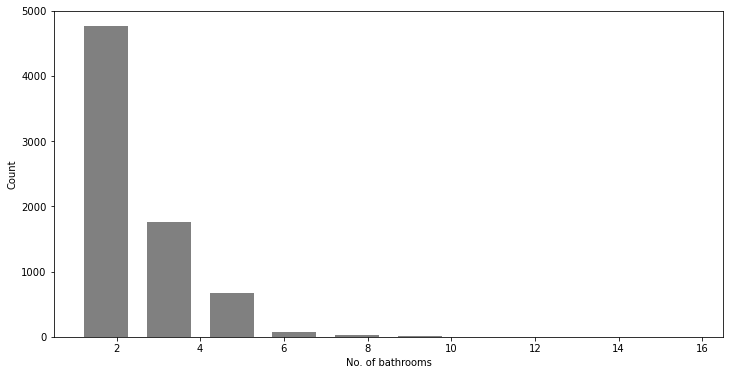

In [68]:
# Plotting histogram for bath
plt.hist(df7['bath'], rwidth=0.7,color='grey')
plt.xlabel('No. of bathrooms')
plt.ylabel('Count')

# (Most of the properties have 2 bathrooms)

In [42]:
# If a property is of 2BHK and has 3 bath so its considered to be okay but what if a property of 3BHK has 5 bath which
# is unlikely and can be considered as outlier

# Anytime we have bathroom greater than no. of Bedrooms+2 we can mark them as outlier and remove it

df7[df7['bath']>df7['BHK']+2]

# (As it can be seen that we 4 Bedroom but 7 bathrooms so its better to remove it)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [43]:
# Removing outliers from bath columns

df8 = df7[~(df7['bath']>df7['BHK']+2)]
df8.shape

(7325, 7)

In [44]:
# As we have cleaned our data, removed outliers from it so now its time to remove few columns
# Removing size column because we have already derived BHK column out of it
# Also removing price_per_sqft because we had created it for outlier detection purpose only

df9 = df8.drop(['size', 'price_per_sqft'], axis='columns')
df9.head()



,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [45]:
# Exploring location column
# Since their are text data in our column so we need to convert it into numeric
# Using One Hot Encoding(get dummies method) to convert text to numeric

dummies = pd.get_dummies(df9['location'], drop_first=True) # always to good practise to use drop_first as it won't affect 
                                                           # our data. In this case Jayanagar col. got dropped and if each
                                                           # of this dummies has value 0 that means that particular 
                                                           # area belongs to Jaya Nagar
dummies.head(3)

# Created 242 dummy columms for all the unique locations

,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df10 = pd.concat([df9, dummies], axis='columns') 
df10.head()

,location,total_sqft,bath,price,BHK,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,2850.0,4.0,428.0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# Now dropping location column as we have already derived dummies col out of it

df11 = df10.drop('location', axis='columns')
df11.head()

# (df11 is our final dataset where we will be futher building our model)

,total_sqft,bath,price,BHK,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,428.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df11.shape

(7325, 245)

In [49]:
#df11.to_csv("D:/Softwares/DS/Project/RealEstate/final_data.csv")

#### Model Building

In [50]:
X = df11.drop('price', axis='columns')
X.head(2)

,total_sqft,bath,BHK,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
y = df11['price']
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [52]:
# Dividing data into train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

In [53]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test) #evaluating score of model

0.8539194454485691

In [54]:
print("Training Score:",lr.score(X_train, y_train))
print("Testing Score:",lr.score(X_test, y_test))

Training Score: 0.8511279858690955
Testing Score: 0.8539194454485691


In [55]:
# R2 score for Linear Regression
from sklearn.metrics import r2_score

lr_pred = lr.predict(X_test)
r2_score(y_test, lr_pred)

0.8539194454485691

In [56]:
# applying K-Fold cross validation

from sklearn.model_selection import ShuffleSplit, cross_val_score
cv1 = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv1)

# (For Linear Regression even if we run 5 folds cross validation our score is more than 80%)

array([0.8507328 , 0.84291693, 0.82053465, 0.83657512, 0.83904732])

In [58]:
# Applying Support Vector Machine Algorithm on data 


# from sklearn.svm import SVR
# svm = SVR(kernel='linear')
# svm.fit(X_train, y_train)
# svm.score(X_test, y_test)

# SVM Score = 75.32%

In [59]:
# Applying Decison Tree Algorithm on data 

# from sklearn.tree import DecisionTreeRegressor
# dt = DecisionTreeRegressor(criterion='mse', splitter='best')
# dt.fit(X_train, y_train)
# dt.score(X_test, y_test)

# DT Score = 74.45%

In [59]:
# Out of all algortihms as we have got more accuracy using Linear Regerssion so that is the final model we will use.

In [60]:
# Creating a function to predict a price

def predict_price(location, sqft, BHK, bath):
    loc_index = np.where(X.columns==location)[0][0]  
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = BHK
    x[2] = bath
    if loc_index >= 0:
        x[loc_index] = 1
    
    return lr.predict([x])[0]


In [61]:
predict_price('1st Phase JP Nagar', 1500, 2, 2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


129.17153326560992

In [62]:
predict_price('1st Phase JP Nagar', 1500, 3, 3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


131.15896181703238

In [63]:
predict_price('Indira Nagar', 1000, 2, 2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


209.39409356992988

In [64]:
predict_price('Indira Nagar', 2000, 2, 2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


287.5112034556298

#### Exporting the Model

In [65]:
# # Exporting Linear Regression Model 

# import pickle
# with open('Banglore_Home_Prices_Model.pickle', 'wb') as f:
#     pickle.dump(lr, f)

In [ ]:
# # Exporting all the columns

# import json
# columns = {
#     'data columns':[col.lower() for col in X.columns]
#           }
# with open('Columns.json', 'w') as f:
#     f.write(json.dumps(columns))